In [0]:
#J.Czaja, nr indexu 5954, st. zaoczne WSIZ
#POBIERAMY BIBLIOTEKI
import requests
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)
#BUDUJEMY FUNKCJE Z PARAMETRAMI POBIERANIA DANYCH Z URL
def funkcja_przykladowa(c, a, b):

    eee=c + '/'+a +'/' + b + '/'
    url2 = 'http://api.nbp.pl/api/exchangerates/rates/A/'+eee
    currency_req = requests.get(url2)
    currency_data = currency_req.json()
    return currency_data['rates']

In [0]:
#2. Używając stworzonej funkcji wczytaj dane dwóch wybranych
#przez siebie kursów

# i wypisujemy przykladowe dane dla GBP i CHF z URL

print("Funt brytyjski  ")
print(funkcja_przykladowa('GBP','2019-09-01','2019-09-30'))

print(" ")
print("Frank szwajcarski  ")
print(funkcja_przykladowa('EUR','2019-09-01','2019-09-30'))

Funt brytyjski  
[{'no': '169/A/NBP/2019', 'effectiveDate': '2019-09-02', 'mid': 4.8123}, {'no': '170/A/NBP/2019', 'effectiveDate': '2019-09-03', 'mid': 4.7823}, {'no': '171/A/NBP/2019', 'effectiveDate': '2019-09-04', 'mid': 4.7897}, {'no': '172/A/NBP/2019', 'effectiveDate': '2019-09-05', 'mid': 4.8248}, {'no': '173/A/NBP/2019', 'effectiveDate': '2019-09-06', 'mid': 4.8348}, {'no': '174/A/NBP/2019', 'effectiveDate': '2019-09-09', 'mid': 4.8405}, {'no': '175/A/NBP/2019', 'effectiveDate': '2019-09-10', 'mid': 4.8406}, {'no': '176/A/NBP/2019', 'effectiveDate': '2019-09-11', 'mid': 4.8601}, {'no': '177/A/NBP/2019', 'effectiveDate': '2019-09-12', 'mid': 4.8497}, {'no': '178/A/NBP/2019', 'effectiveDate': '2019-09-13', 'mid': 4.8705}, {'no': '179/A/NBP/2019', 'effectiveDate': '2019-09-16', 'mid': 4.8609}, {'no': '180/A/NBP/2019', 'effectiveDate': '2019-09-17', 'mid': 4.8882}, {'no': '181/A/NBP/2019', 'effectiveDate': '2019-09-18', 'mid': 4.8953}, {'no': '182/A/NBP/2019', 'effectiveDate': '201

In [0]:
#3.Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.

#POBIERAMY dane o kursie dla 4 walut, za pomoca ww. funkcji,
#podajemy parametry dla wywolywanej funkcji 
#wybieramy potrzebne kolumny, odpowiednio ustawiamy indeks
#dla kursu kazdej waluty otrzymujemy szereg czasowy(data w jednej "kolumnie", dane w drugiej)
dane_wykres3 = pd.DataFrame.from_dict(funkcja_przykladowa('GBP','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']
dane_wykres4 = pd.DataFrame.from_dict(funkcja_przykladowa('CHF','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']
dane_wykres = pd.DataFrame.from_dict(funkcja_przykladowa('USD','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']
dane_wykres2 = pd.DataFrame.from_dict(funkcja_przykladowa('EUR','2019-09-01','2019-09-30')).set_index(['effectiveDate'])['mid']

#Budujemy tabele i nadajemy nazwy kolumn dla kazdej daty dziennej
df = pd.DataFrame({'USD': dane_wykres}, columns=["USD","EUR","GBP","CHF"])
df['EUR'] = dane_wykres2
df['GBP'] = dane_wykres3
df['CHF'] = dane_wykres4

#pokazujemy pierwsze 7 wierszy szeregów czasowych w zlozonej tabeli
#bez parametru w nawiasie by pokazalo tylko 5
df.head(7)

 

,USD,EUR,GBP,CHF
effectiveDate,,,,
2019-09-02,3.9819,4.3691,4.8123,4.0192
2019-09-03,3.9882,4.3667,4.7823,4.0244
2019-09-04,3.9414,4.3385,4.7897,3.9966
2019-09-05,3.9330,4.3409,4.8248,4.0021
2019-09-06,3.9315,4.3392,4.8348,3.9753
2019-09-09,3.9310,4.3373,4.8405,3.9688
2019-09-10,3.9273,4.3350,4.8406,3.9620


In [0]:
#pokazujemy ostatnie 5 wierszy szeregów czasowych w zlozonej tabeli
df.tail()

,USD,EUR,GBP,CHF
effectiveDate,,,,
2019-09-24,3.9838,4.3796,4.9509,4.0219
2019-09-25,3.9856,4.3844,4.9552,4.0437
2019-09-26,4.0092,4.3861,4.9426,4.0352
2019-09-27,4.0154,4.3866,4.9332,4.0439
2019-09-30,4.0000,4.3736,4.9313,4.0278


Text(0, 0.5, 'KURS WZGLEDEM PLN')

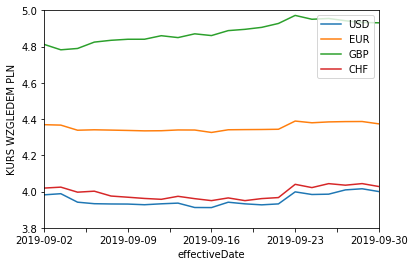

In [0]:
#rysujemy dane szeregow czasowych 4 walut na 1 wykresie
#okreslamy min osi Y dla poprawy widocznoscid danych
#df.plot.area(stacked=False);

df.plot(ylim=(3.8,5))
plt.ylabel('KURS WZGLEDEM PLN')

In [0]:
#Obliczamy srednia kroczaca (usrednianie z 10 wartosci jedna za druga)
#dlatego pierwsze 10 wierszy jest pyste w tabeli wartosci ze srd. kroczaca

print("Obliczamy srednia kroczaca kursu walutowego dla 4 walut")
ma = df.rolling(10).mean()
print(ma)

Obliczamy srednia kroczaca kursu walutowego dla 4 walut
                   USD      EUR      GBP      CHF
effectiveDate                                    
2019-09-02         NaN      NaN      NaN      NaN
2019-09-03         NaN      NaN      NaN      NaN
2019-09-04         NaN      NaN      NaN      NaN
2019-09-05         NaN      NaN      NaN      NaN
2019-09-06         NaN      NaN      NaN      NaN
2019-09-09         NaN      NaN      NaN      NaN
2019-09-10         NaN      NaN      NaN      NaN
2019-09-11         NaN      NaN      NaN      NaN
2019-09-12         NaN      NaN      NaN      NaN
2019-09-13     3.94149  4.34420  4.83053  3.98402
2019-09-16     3.93446  4.33991  4.83539  3.97710
2019-09-17     3.92976  4.33734  4.84598  3.97115
2019-09-18     3.92884  4.33768  4.85654  3.96648
2019-09-19     3.92821  4.33784  4.86468  3.96239
2019-09-20     3.92825  4.33830  4.87397  3.96154
2019-09-23     3.93498  4.34348  4.88713  3.96865
2019-09-24     3.94063  4.34794  4.89816  3.

In [0]:

#Budujemy tabele i filtrujemy lambda kursy mniejsze niz 4.34
#dla USD otrzymujemy tabele bez wartosci liczbowych i jest ciag NaN
dff = pd.DataFrame({'USD': list(filter(lambda x: x>4.34, dane_wykres.to_numpy()))}, columns=["USD","EUR","GBP","CHF"])
dff['EUR'] = list(filter(lambda x: x>4.34, dane_wykres2.to_numpy()))
dff['GBP'] = list(filter(lambda x: x>4.34, dane_wykres2.to_numpy()))
dff['CHF'] = list(filter(lambda x: x>4.34, dane_wykres2.to_numpy()))
print(dff)
print()
#######################################################
#Zastosowanie REDUCE z lambda, mnozenie wartosci kursu, kosmiczne liczby....
#tworzymy ciag dla USD, ale zmniejszamy granice filtrowania do 3.34 dla kursu
#inaczej reduce wyrzuci blad no initial value, bo jest ciag NaN ww. dokonanym filtorwaniu
ba = list(filter(lambda x: x>3.34, dane_wykres.to_numpy()))

from functools import reduce
print ("wynik reduce dla danych kursu USD : " , reduce((lambda x, y: x * y), ba))
#korzystany z odniesien do tablicy danych po filtrowaniu
print ("wynik reduce dla danych kursu EUR : " , reduce((lambda x, y: x * y), dff['EUR']))
print ("wynik reduce dla danych kursu GBP : " , reduce((lambda x, y: x * y), dff['GBP']))
print ("wynik reduce dla danych kursu CHF : " , reduce((lambda x, y: x * y), dff['CHF']))
print()
#######################################################
#podstawowe statystki danych kursow 4 walut, np.min,max, odchylenie, srednia etc.
#df.apply(lambda x: x.describe())
att=(lambda x: x.describe())
print(att(df))
print()
#######################################################

#tworzymy funkcje z lambda
#zabawa w przemnozenie lambda wszystkich kursow 
def fff(num):
    return lambda x: x * num
result1 = fff(20)
result1(df)
print(result1(df))

    USD     EUR     GBP     CHF
0   NaN  4.3691  4.3691  4.3691
1   NaN  4.3667  4.3667  4.3667
2   NaN  4.3409  4.3409  4.3409
3   NaN  4.3410  4.3410  4.3410
4   NaN  4.3419  4.3419  4.3419
5   NaN  4.3425  4.3425  4.3425
6   NaN  4.3438  4.3438  4.3438
7   NaN  4.3891  4.3891  4.3891
8   NaN  4.3796  4.3796  4.3796
9   NaN  4.3844  4.3844  4.3844
10  NaN  4.3861  4.3861  4.3861
11  NaN  4.3866  4.3866  4.3866
12  NaN  4.3736  4.3736  4.3736

wynik reduce dla danych kursu USD :  3461725822796.617
wynik reduce dla danych kursu EUR :  208819037.33926
wynik reduce dla danych kursu GBP :  208819037.33926
wynik reduce dla danych kursu CHF :  208819037.33926

             USD        EUR        GBP        CHF
count  21.000000  21.000000  21.000000  21.000000
mean    3.954800   4.354133   4.879471   3.992638
std     0.034119   0.021227   0.056594   0.034420
min     3.911600   4.326200   4.782300   3.949900
25%     3.931500   4.339200   4.840500   3.962000
50%     3.936200   4.341900   4.8705

Obliczamy korelację Spearmana miedzy kursem GBP i CHF
0.3103896103896104
Obliczamy korelacje kursow GBP I CHF, generujemy wykres punktowy(matplotlib)


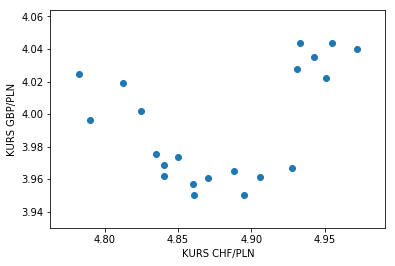

Obliczamy korelacje kursow GBP I CHF, generujemy wykres punktowy(seaborn)


Text(0.5, 0, 'KURS CHF/PLN')

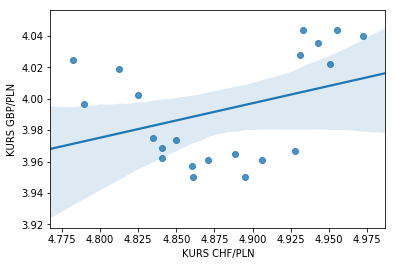

In [0]:


#Obliczamy korelację Spearmana miedzy kursem GBP i CHF
q=dane_wykres3.corr(dane_wykres4, method= 'spearman')
print("Obliczamy korelację Spearmana miedzy kursem GBP i CHF")
print(q)

#Obliczamy korelacje GBP I CHF, generujemy wykres punktowy
#czyli wykres rozproszenia, aby zbadać związek między tymi dwiema zmiennymi.
#korelacja dotyczy siły badanej współzależności

print("Obliczamy korelacje kursow GBP I CHF, generujemy wykres punktowy(matplotlib)")

#from matplotlib import pyplot
#korelacja na wykresie

plt.scatter(dane_wykres3, dane_wykres4)
plt.ylabel('KURS GBP/PLN')
plt.xlabel('KURS CHF/PLN')
plt.show()
print("Obliczamy korelacje kursow GBP I CHF, generujemy wykres punktowy(seaborn)")

sns.regplot(dane_wykres3, dane_wykres4)
plt.ylabel('KURS GBP/PLN')
plt.xlabel('KURS CHF/PLN')

Budujemy heatmape korelacje kursow USD, EUR, GBP, CHF


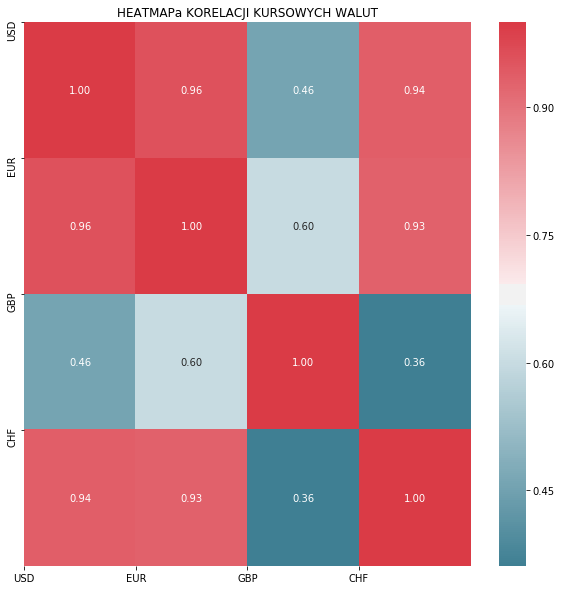

In [0]:
#ZBUDOWANIE HEATMAP korelacji dla 4 badanych kursow walut
import numpy as np

df = pd.DataFrame({'USD': dane_wykres}, columns=["USD","EUR","GBP","CHF"])
df['EUR'] = dane_wykres2
df['GBP'] = dane_wykres3
df['CHF'] = dane_wykres4
corr=df.corr(method= 'pearson')

print("Budujemy heatmape korelacje kursow USD, EUR, GBP, CHF")

fig, ax = plt.subplots(figsize=(10, 10))
#Generowanie macierzy korelacji wyrazonej kolorami
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.title('HEATMAPa KORELACJI KURSOWYCH WALUT')
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()



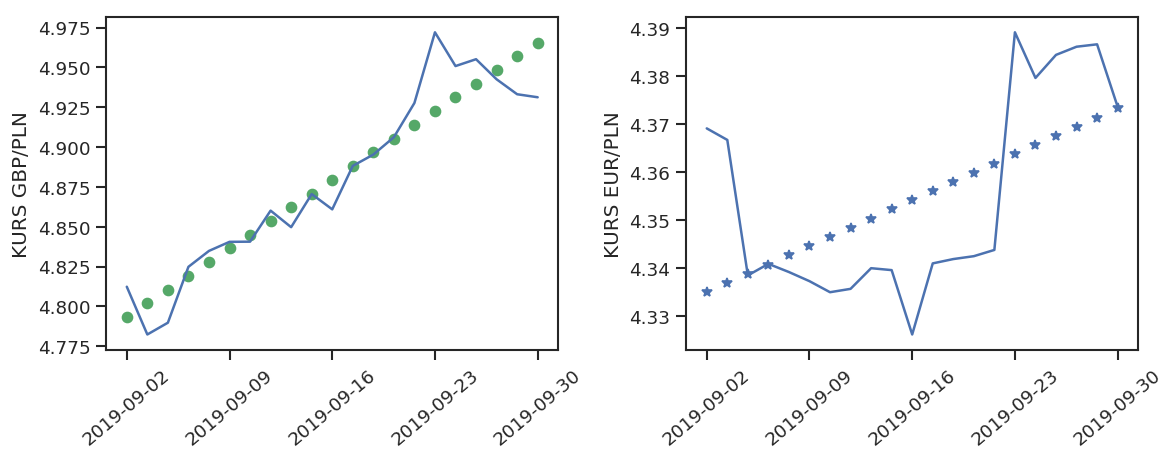

In [0]:
#generujemy linię regresji dla kursow EUR I USD
#regresja dotyczy charakteru zależności pomiędzy cechami.

plt.figure(figsize=(10,4), dpi=120) # 10 is width, 4 is height

x = np.arange(len(dane_wykres3), dtype=int)
a, b = np.polyfit(x, dane_wykres3, 1)

# matematyka, szkoła średnia
y = a*x+b

x2 = np.arange(len(dane_wykres2), dtype=int)
a2, b2 = np.polyfit(x2, dane_wykres2, 1)

# matematyka, szkoła średnia
y2 = a2*x2+b2

plt.subplot(1,2,1)  #ukladamy 2 wykresy obok siebie
plt.plot(x, y, 'go')
plt.ylabel('KURS GBP/PLN') # nadajmy nazwe osi Y
plt.plot(dane_wykres3)
plt.tight_layout()
plt.xticks((0, 5, 10, 15, 20)) #okreslamy gestosc oznaczen osi X 
plt.xticks(rotation=40)        #zmieniamy nachylenie tekstu pod osia X
plt.subplot(1,2,2)
plt.plot(x2, y2, 'b*')
plt.plot(dane_wykres2)
plt.ylabel('KURS EUR/PLN')

plt.tight_layout()
plt.xticks((0, 5, 10, 15, 20))
plt.xticks(rotation=40)
plt.show()

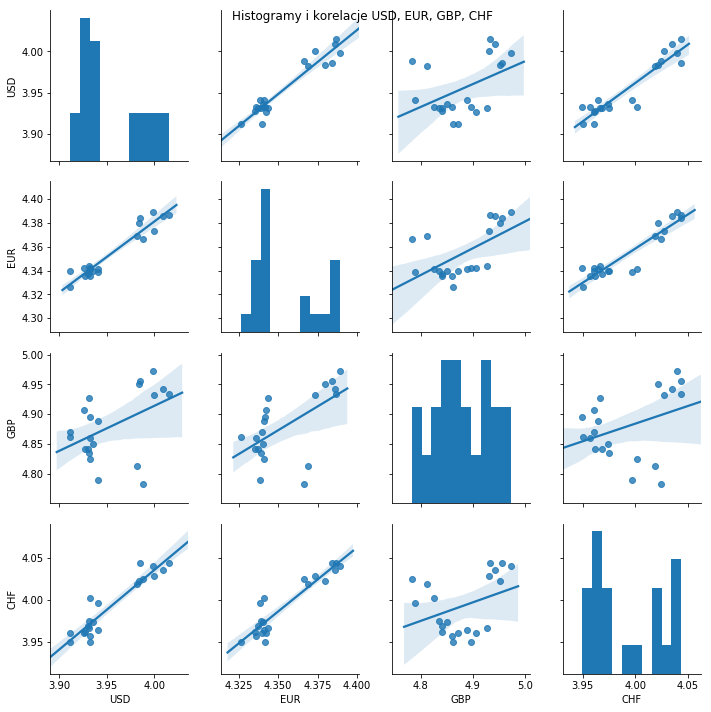

In [0]:
# REGRESJA, KORELACJA, DYSTRYBUCJA
#regresja dotyczy kształtu zależności pomiędzy cechami.
#scatter matrix czyli tzw.Macierz rozproszenia składa się z kilku par wykresów rozproszenia zmiennych przedstawionych
#w formacie macierzy. Można go użyć do ustalenia, czy zmienne są skorelowane i czy korelacja jest dodatnia czy ujemna.
import seaborn as sns
import pandas as pd
import numpy as np
 
df = pd.DataFrame({'USD': dane_wykres}, columns=["USD","EUR","GBP","CHF"])
df['EUR'] = dane_wykres2
df['GBP'] = dane_wykres3
df['CHF'] = dane_wykres4

#rysowanie wykresow w formie macierzowego zestawienia
g = sns.pairplot(df, kind="reg")
g.fig.suptitle("Histogramy i korelacje USD, EUR, GBP, CHF")
plt.show()
